In [1]:
using Plots
using Distributed
using LinearAlgebra

using DPMMSubClusters
using Random

┌ Info: Precompiling DPMMSubClusters [2841fd70-8698-11e9-176d-6dfa142d2ee7]
└ @ Base loading.jl:1423


## Ploting Function

In [2]:
function plot_dp_2d(pts, labels)
    plt=Plots.plot()
    Plots.plot!(pts[1,:],pts[2,:], seriestype=:scatter, color = Int64.(labels), markersize = 3, markerstrokewidth = 0.5)
    return plt
end

plot_dp_2d (generic function with 1 method)

## Genereate data
10^5 Points, 2D, Generated from a 6 components Gaussian mixture model
with components mean sampled from a normal distribution with isotropic variance scaled by 80.

In [3]:
Random.seed!(12345)
x,labels,clusters = generate_gaussian_data(10^4,2,6,80.0)

[2654, 376, 346, 752, 2719, 3153]


(Float32[10.211997 7.3538775 … 6.7289605 5.8039546; -11.291986 -10.708279 … 15.326528 14.738987], Float32[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0], Float32[8.896731 -0.64462227 … -0.26656976 7.3293567; -11.498436 -5.0597415 … -2.217631 14.746243], [1.0038251 -0.1749929; -0.1749929 0.30505678;;; 0.36728948 0.59447956; 0.59447956 1.7343322;;; 0.43975484 0.8580509; 0.8580509 4.787797;;; 0.47275025 0.013618828; 0.013618828 0.31670114;;; 0.6271223 -0.7196311; -0.7196311 1.198287;;; 2.4178236 0.08767694; 0.08767694 0.17157643])

## Plot Data

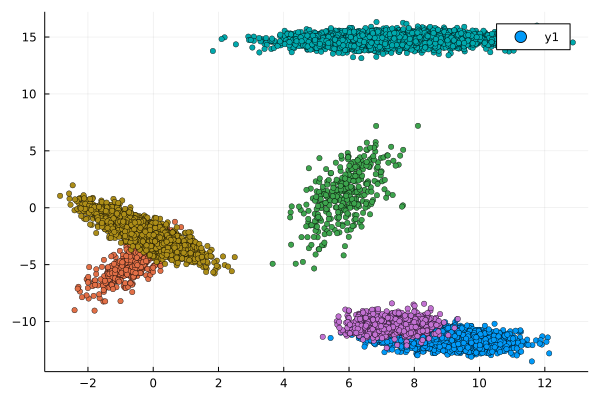

In [4]:
plot_dp_2d(x, labels)

## Run Model
With concetration parameter of 100.

In [33]:
labels,clusters,weights,_,_,_,_,sublabels = fit(x,100.0, iters = 25, seed = 1234, gt=labels,burnout=5,smart_splits=false);

Loading and distributing data:
  0.000173 seconds (122 allocations: 84.141 KiB)
Node Leaders:
Dict{Any, Any}(1 => Any[1])
Iteration: 1 || Clusters count: 1 || Log posterior: -66555.80017457053 || Vi score: 1.310645983917004 || NMI score: 1.01649693807367e-15 || Iter Time:0.005290031433105469 || Total time:0.005290031433105469
Iteration: 2 || Clusters count: 1 || Log posterior: -66555.80017457053 || Vi score: 1.310645983917004 || NMI score: 1.01649693807367e-15 || Iter Time:0.004987955093383789 || Total time:0.010277986526489258
Iteration: 3 || Clusters count: 1 || Log posterior: -66555.80017457053 || Vi score: 1.310645983917004 || NMI score: 1.01649693807367e-15 || Iter Time:0.00435185432434082 || Total time:0.014629840850830078
Iteration: 4 || Clusters count: 1 || Log posterior: -66555.80017457053 || Vi score: 1.310645983917004 || NMI score: 1.01649693807367e-15 || Iter Time:0.0033750534057617188 || Total time:0.018004894256591797
Iteration: 5 || Clusters count: 1 || Log posterior: -6

## Plot

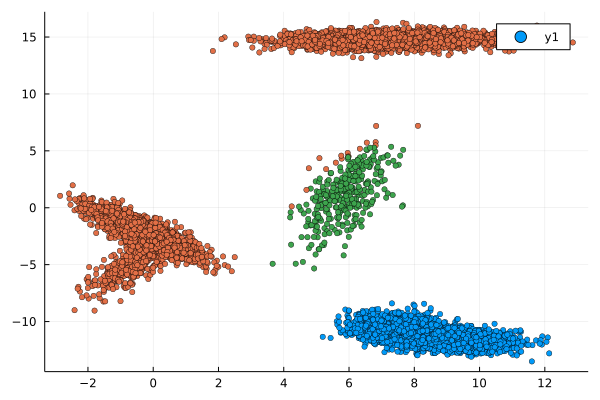

In [34]:
plot_dp_2d(x,labels)

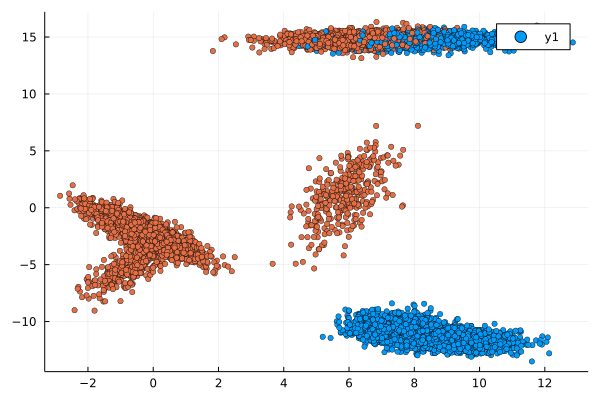

In [28]:
plot_dp_2d(x,sublabels)